# Study Linelist

# To do list :

- Correct project helpers (remove train/test split) Lavi 
- Be sure to have scale = True     Lavi 
- add score function from Ridha    Lavi
- Normalize
-  AJD 

- On the third data frame for prediction do :

- SVM (add for example sigmoid in crosss validation, beware it takes time ....) Jean
- Logistic regression (look Ridha) Ced
- Decision treeeeeeeeessss :)))) Vive la foret Cedric
- Random forest <3 (look at how to find the important features in it)      Lavi
- (XGBOOST) (Lavi)

Do the same for outcome ! 

- SVM (add for example sigmoid in crosss validation, beware it takes time ....) Jean
- Logistic regression (look Ridha) Jean 
- Decision treeeeeeeeessss :)))) Vive la foret Ced
- Random forest <3 (look at how to find the important features in it)    Cedric
- (XGBOOST) (Lavi)

Deadline: Tuesday (oh god)

*Imagine Cedric motivating you Jean*



In [296]:
%matplotlib inline
%load_ext autoreload

%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sys
sys.path.append('STUDIES')
from proj2_HELPERS_ import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [297]:
df_linelist = pd.read_csv('../../Original dataset/EGOYQN_Gueckedou_linelist_cleaned_pos_and_neg_2019_November_ANSI.csv', encoding = 'ISO-8859-1')
df_linelist.head()

,msfid,mcid,datmac,transit,admis,gkdid,datgck,age,sex,respref,...,pcr2ct,epistat,commun,currstat,exdat,outold,outcome,locdec,condat,source
0,G1,Absent,01/01/1900,Non,Non,Absent,01/01/1900,60.0,2,14,...,.,2,1,1,2/22/2014,3,2,GUECKEDOU,02/02/2014,.
1,G10,Absent,01/01/1900,Non,Non,Absent,01/01/1900,35.0,2,14,...,.,1,0,1,3/17/2014,1,2,Hosto GKD,2/25/2014,.
2,G100,Absent,01/01/1900,Non,Oui,GKD25,04/11/2014,40.0,1,14,...,.,1,0,2,4/20/2014,8,1,na,01/01/1900,.
3,G1000,MC260,9/17/2014,Non,Oui,GKD775,01/01/1900,40.0,1,25,...,.,1,0,1,9/19/2014,3,2,Non rempli,01/01/1900,.
4,G1001,Absent,9/17/2014,Non,Oui,GKD776,9/19/2014,8.0,2,25,...,.,1,0,1,9/21/2014,3,2,Non rempli,01/01/1900,.


# Predictions ebola

### Symptoms 

In [298]:
symptoms = ['symfev', 'symn', 'symv', 'symvom', 'symdiar', 'symfat',
       'symanor', 'symdouab', 'symdouth', 'symdoumu', 'symdouar',
       'symceph', 'symtoux', 'symresp', 'symaval', 'symmalg', 'symict',
       'symconj', 'symercut', 'symhoq', 'symorb', 'symcoma', 'symconf',
       'symasth', 'symhemor', 'hemgen', 'heminj', 'hemnez', 'hemsel',
       'hemvoms', 'hemvomn', 'hemtou', 'hemvag', 'hempet', 'hemuri',
       'hemaut', 'contsusp', 'funvis', 'hospvis', 'anicon', 'anitiq']
df_symp = df_linelist[symptoms]

In [299]:
# apply dictionnary to get -1, 0, 1 for df_symp
dict_symp_answer = {'Non' : 'No', 'Oui' : 'Yes', 'Non rempli' : 'Unknown', 
                    'Pas applicable (non inclus dans fiche)' : 'Unknown', 
                    'Unknown' : '-1', 'Nan' : '-1', 'nan' : '-1', '7' : '-1',
                    'na': '-1', '.': '-1', 
                    '8': '-1', '9': '-1', '1':'1', '0':'0', '2':'-1', '3':'-1'}
df_symp = df_symp.astype('str')
df_symp = df_symp.applymap(lambda x : dict_symp_answer[x])

### Sex 

In [209]:
df_sex = df_linelist['sex']
df_sex = df_sex.astype('str')
dict_sex = {'1': '1', '2':'0', '9': '-1'}
df_sex = df_sex.apply(lambda x : dict_sex[x])

### Age 

In [210]:
df_age  = df_linelist['age']
df_age = df_age.replace(999, -1)

### Ebola 

In [211]:
# apply dictionnary to get -1, 0, 1 for df_ebola  --> 0: not a case, 1: ebola, -1: unknown
df_ebola  = df_linelist['epistat']
dict_ebola_answer = {'0':'0', '1':'1', '2':'1', '3':'-1', '9':'-1', '.':'-1'}
df_ebola = df_ebola.astype('str')
df_ebola = df_ebola.apply(lambda x : dict_ebola_answer[x])

### Assemble

In [212]:
# concatenate symptoms, age, sex and ebola
df_ebo = pd.concat([df_age, df_sex, df_symp, df_ebola], axis = 1, join = 'outer').astype('int')

# add constant column --> only for linear regression, SVM, etc
#df_ebo = sm.add_constant(df_ebo).astype('int')
df_ebo   

,age,sex,symfev,symn,symv,symvom,symdiar,symfat,symanor,symdouab,...,hemvag,hempet,hemuri,hemaut,contsusp,funvis,hospvis,anicon,anitiq,epistat
0,60,0,1,-1,-1,1,0,-1,-1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
1,35,0,1,-1,-1,1,1,-1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,40,1,1,-1,-1,0,0,-1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
3,40,1,1,-1,-1,0,1,-1,1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
4,8,0,1,-1,-1,0,1,-1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-1,0,0,-1,-1,1,1,-1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2496,43,1,0,-1,-1,0,1,-1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2497,34,0,0,-1,-1,1,0,-1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
2498,6,1,1,-1,-1,0,0,-1,1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1


### Feature processing

First drop rows where no symtoms

In [300]:
# convert all -1 to NaN so that we can use the dropna() function
df_ebo.replace(-1, np.nan, inplace=True)
# then drop rows with only nans 
df_ebo.dropna(axis=0, how='all', subset=symptoms, inplace=True)
# convert all NaN to -1 
df_ebo.replace(np.nan, -1, inplace=True)
df_ebo  

,age,sex,symfev,symn,symv,symvom,symdiar,symfat,symanor,symdouab,...,hemvag,hempet,hemuri,hemaut,contsusp,funvis,hospvis,anicon,anitiq,epistat
0,60.0,0.0,1.0,-1.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1,35.0,0.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
2,40.0,1.0,1.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
3,40.0,1.0,1.0,-1.0,-1.0,0.0,1.0,-1.0,1.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
4,8.0,0.0,1.0,-1.0,-1.0,0.0,1.0,-1.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-1.0,0.0,0.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
2496,43.0,1.0,0.0,-1.0,-1.0,0.0,1.0,-1.0,0.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
2497,34.0,0.0,0.0,-1.0,-1.0,1.0,0.0,-1.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
2498,6.0,1.0,1.0,-1.0,-1.0,0.0,0.0,-1.0,1.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0


## First proposition of data frame

In [301]:
df_ebo_simple = delete_minus1(df_ebo)
df_ebo_simple

,age,sex,symfev,symvom,symdiar,symanor,symdouab,symdouar,symceph,symhoq,symasth,symhemor,epistat
1,35.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,40.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,40.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,8.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5,12.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,26.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2496,43.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2497,34.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2498,6.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [215]:
from sklearn.preprocessing import StandardScaler

# standardize age for df_ebo_simple

scaler1 = StandardScaler()
scaler1.fit(df_ebo_simple['age'].to_numpy().reshape(-1, 1))
df_ebo_simple['age'] = scaler1.transform(df_ebo_simple['age'].to_numpy().reshape(-1, 1))
df_ebo_simple

,age,sex,symfev,symvom,symdiar,symanor,symdouab,symdouar,symceph,symhoq,symasth,symhemor,epistat
1,0.178110,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.443866,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.443866,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-1.256973,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5,-1.044368,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,-0.300251,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2496,0.603320,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2497,0.124959,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2498,-1.363276,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [216]:
y_ebo_simple = df_ebo_simple['epistat'].astype(float)
X_ebo_simple = df_ebo_simple.drop(['epistat'], axis = 1).astype(float)

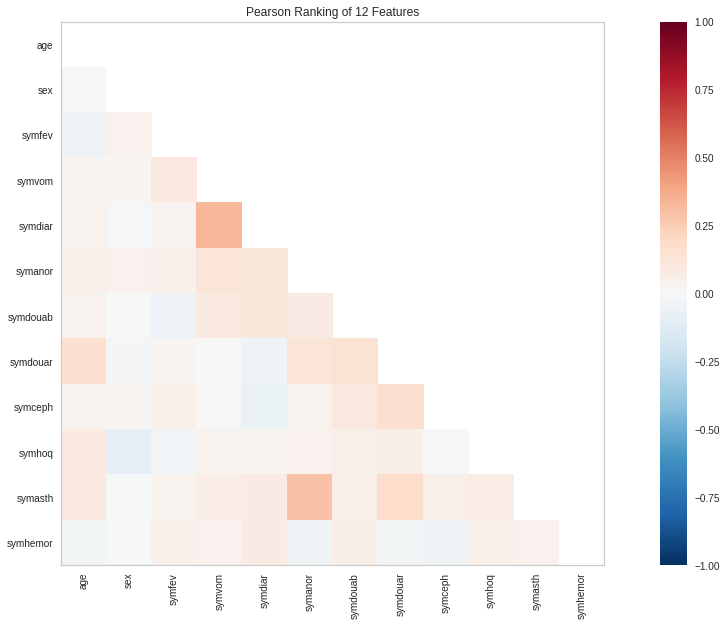

In [217]:
Corr_vision(X_ebo_simple)

## Second proposition of data frame

In [218]:
df_ebo_extra = df_ebo
# delete all rows where y = -1 :
df_ebo_extra = df_ebo_extra[df_ebo_extra['epistat']!=-1]
df_ebo_extra = make_indicators(df_ebo_extra, df_ebo_extra.drop('epistat', axis=1).columns, [-1]*len(df_ebo_extra.drop('epistat', axis=1).columns), False)
df_ebo_extra                                                                                                    

,age,sex,symfev,symn,symv,symvom,symdiar,symfat,symanor,symdouab,...,hemtou_indicator,hemvag_indicator,hempet_indicator,hemuri_indicator,hemaut_indicator,contsusp_indicator,funvis_indicator,hospvis_indicator,anicon_indicator,anitiq_indicator
0,60.0,0.0,1.0,-1.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,35.0,0.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.0,1.0,1.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.0,1.0,1.0,-1.0,-1.0,0.0,1.0,-1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.0,0.0,1.0,-1.0,-1.0,0.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-1.0,0.0,0.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2496,43.0,1.0,0.0,-1.0,-1.0,0.0,1.0,-1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2497,34.0,0.0,0.0,-1.0,-1.0,1.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,6.0,1.0,1.0,-1.0,-1.0,0.0,0.0,-1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [219]:
## standardize age for df_out_extra

# change -1 to Nan so that it is not take into account when doing standardization 
df_ebo_extra['age'].replace(-1, np.nan, inplace=True)
df_ebo_extra

# standardization
scaler2 = StandardScaler()
scaler2.fit(df_ebo_extra['age'].to_numpy().reshape(-1, 1))
df_ebo_extra['age'] = scaler2.transform(df_ebo_extra['age'].to_numpy().reshape(-1, 1))

# we can rechange nans to -1 
df_ebo_extra['age'].replace(np.nan, -1, inplace=True)
df_ebo_extra

,age,sex,symfev,symn,symv,symvom,symdiar,symfat,symanor,symdouab,...,hemtou_indicator,hemvag_indicator,hempet_indicator,hemuri_indicator,hemaut_indicator,contsusp_indicator,funvis_indicator,hospvis_indicator,anicon_indicator,anitiq_indicator
0,1.505558,0.0,1.0,-1.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.177863,0.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.443402,1.0,1.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.443402,1.0,1.0,-1.0,-1.0,0.0,1.0,-1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.256048,0.0,1.0,-1.0,-1.0,0.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-1.000000,0.0,0.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2496,0.602725,1.0,0.0,-1.0,-1.0,0.0,1.0,-1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2497,0.124755,0.0,0.0,-1.0,-1.0,1.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,-1.362264,1.0,1.0,-1.0,-1.0,0.0,0.0,-1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [220]:
# sanity check 
print(sum(df_ebo_extra['age_indicator']==0))
print(sum(df_ebo_extra['age']==-1))

print(sum(df_ebo_extra['epistat']==0))
print(sum(df_ebo_extra['epistat']==1))

12
12
602
1272


In [221]:
y_ebo_extra = df_ebo_extra['epistat'].astype(float)
X_ebo_extra = df_ebo_extra.drop(['epistat'], axis = 1).astype(float)

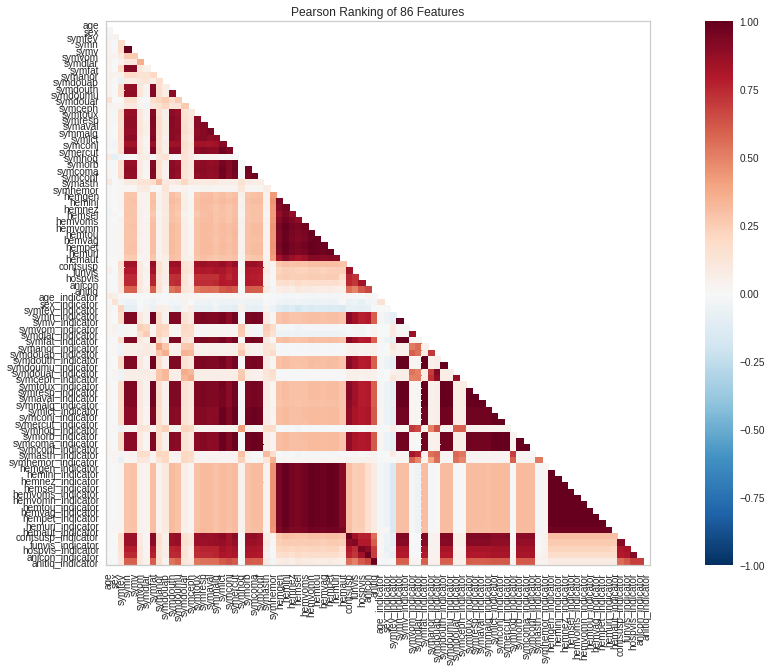

In [222]:
Corr_vision(X_ebo_extra) # very high correlation between some features so 

## Third proposition of data frame

In [352]:
df_rid = pd.read_csv("Rid_frame.csv")

df_rid

,msfid,age,datmac_dayofyear,datgck_dayofyear,sex_F,sex_M,sex_U,symfev,symvom,symdiar,...,conttyp_Dead,conttyp_Unknown,funvis_No,funvis_Unknown,funvis_Yes,fundat_dayofyear,funcont_No,funcont_Unknown,funcont_Yes,epistat
0,G10,35.0,-1,-1,0,1,0,1,1,1,...,0,1,0,1,0,-1,0,1,0,1
1,G100,40.0,-1,101,1,0,0,1,0,0,...,0,1,0,1,0,-1,0,1,0,1
2,G1000,40.0,260,-1,1,0,0,1,0,1,...,0,1,0,1,0,-1,0,1,0,1
3,G1001,8.0,260,262,0,1,0,1,0,1,...,0,1,0,1,0,-1,0,1,0,1
4,G1002,12.0,258,262,0,1,0,1,1,1,...,1,0,1,0,0,-1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,G995,30.0,-1,-1,0,1,0,0,1,1,...,0,1,0,1,0,-1,0,1,0,1
1717,G996,43.0,-1,261,1,0,0,0,0,1,...,0,1,0,1,0,-1,0,1,0,1
1718,G997,34.0,-1,262,0,1,0,0,1,0,...,0,1,0,1,0,-1,0,1,0,0
1719,G998,6.0,-1,260,1,0,0,1,0,0,...,0,1,0,1,0,-1,0,1,0,1


## ML models to predict ebola

### Models for simple data frame

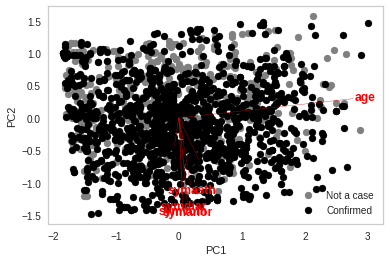

In [292]:
PCA_(2,X_ebo_simple, y_ebo_simple)

#pca_explained_ratio

In [293]:
X_ebo_simple

,age,sex,symfev,symvom,symdiar,symanor,symdouab,symdouar,symceph,symhoq,symasth,symhemor
1,0.178110,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.443866,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.443866,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-1.256973,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,-1.044368,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,-0.300251,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2496,0.603320,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2497,0.124959,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2498,-1.363276,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


#### Decision tree 

/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


{'max_depth': 4, 'min_samples_split': 2} 0.6405231417100745
Macro F1 score(test):  0.5455490578297595
Micro F1 score(test):  0.6617100371747212
Accuracy under curve(test):  0.5662071846282373


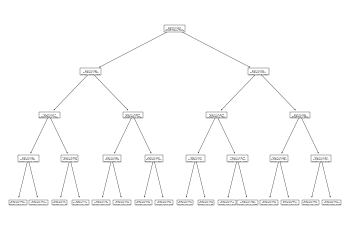

In [305]:
from sklearn.model_selection import GridSearchCV
param_test_dec_tree = {
    'max_depth':[i for i in range(3, 6)],
    'min_samples_split':[i for i in range(2, 5)]

}

X_train, X_test, y_train, y_test = train_test_split(X_ebo_simple,y_ebo_simple, test_size = 0.3, random_state = 123)
DTC = tree.DecisionTreeClassifier(random_state = 123)
gsearch_DT = GridSearchCV(
    estimator= DTC,
    param_grid= param_test_dec_tree,
    scoring='roc_auc',
    n_jobs=4,
    iid=False,
    cv=5
)
gsearch_DT.fit(X_train, y_train)
y_pred = gsearch_DT.predict_proba(X_test)
print(gsearch_DT.best_params_, gsearch_DT.best_score_)
max_depth_DC = gsearch_DT.best_params_['max_depth']
min_samples_split_DC = gsearch_DT.best_params_['min_samples_split']

Decision_trees(X_ebo_simple, y_ebo_simple, max_depth_DC, min_samples_split_DC)

#### Random Forest

In [183]:
#### Adding Gridsearch Cross validation 
from sklearn.model_selection import GridSearchCV
param_test = {
    'n_estimators':[i for i in range(5, 20)],
    'max_depth':[i for i in range(3, 15)],
    'min_samples_split':[i for i in range(2, 5)]
}

clforest = RandomForestClassifier(random_state = 123)
gsearch = GridSearchCV(
    estimator= clforest,
    param_grid= param_test,
    scoring='roc_auc',
    n_jobs=4,
    iid=False,
    cv=5
)
gsearch.fit(X_train, y_train)
gsearch.best_params_, gsearch.best_score_

/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 19},
 0.6736134576252544)

In [294]:
# Optimal, parameters
#clforest.set_params(max_depth=gsearch.best_params_['max_depth'],min_samples_split=gsearch.best_params_['min_samples_split'],n_estimators=gsearch.best_params_['n_estimators'])


max_depth=gsearch.best_params_['max_depth']
min_samples_split=gsearch.best_params_['min_samples_split']
n_estimators=gsearch.best_params_['n_estimators']
index_tree = 2 # Which tree to plot [from 0 to n_est -1 I think]

Random_forest(X_ebo_simple,y_ebo_simple,n_estimators,index_tree, max_depth,min_samples_split, split = 0.3)

DecisionTreeClassifier(max_depth=4, max_features='auto',
                       random_state=1228959102)
Macro F1 score(test):  0.45551248923341947
Micro F1 score(test):  0.6505576208178439
Accuracy under curve(test):  0.5269423558897243


#### SVM

In [295]:
SVM_(X_ebo_simple,y_ebo_simple, param_grid = {'C': [0.1,1], 'gamma': [1,0.1],'kernel': ['sigmoid', 'poly']})

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SVC(C=0.1, gamma=0.1, kernel='sigmoid')
Macro F1 score(test):  0.38863636363636367
Micro F1 score(test):  0.6356877323420075
Accuracy under curve(test):  0.5


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    5.3s finished


# For this simple data-frame, results are not accurate, let's proceed to a "more engineered" dataframe

### Models for extra data frame

###### Beware that this model has high correlations... Take care of it ?

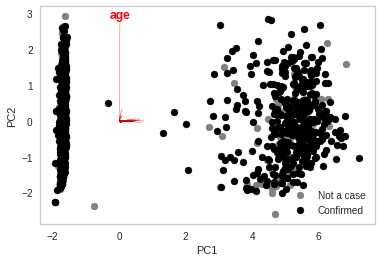

array([1.00024641, 0.50261977, 0.47213027, 0.69589251, 0.69502834,
       0.50859381, 0.51355542, 0.80778966, 0.54114799, 0.51326769,
       0.55332108, 0.6809956 , 0.52436787, 0.53657997, 0.54135932,
       0.5272569 , 0.55119125, 0.55312513, 0.43688506, 0.58228534,
       0.44057092, 0.27642449, 0.46075269, 0.43566128, 0.45078614,
       0.49027218, 0.34171545, 0.21618019, 0.1717755 , 0.20119013,
       0.23685733, 0.19726111, 0.1717755 , 0.1762832 , 0.1806769 ,
       0.1717755 , 0.1762832 , 0.22566893, 0.79502078, 0.59905916,
       0.45913444, 0.39418989, 0.31124271, 0.07978602, 0.04616333,
       0.06101934, 0.43297409, 0.43297409, 0.08302162, 0.08913159,
       0.43297409, 0.14456927, 0.13729993, 0.43235512, 0.43297409,
       0.13915594, 0.13729993, 0.43204431, 0.43266504, 0.43266504,
       0.43204431, 0.42596886, 0.42596886, 0.42662381, 0.10774029,
       0.42596886, 0.42629679, 0.42629679, 0.09202995, 0.10774029,
       0.1717755 , 0.1717755 , 0.1717755 , 0.1717755 , 0.17177

In [291]:
#X_ebo_extra_pca = X_ebo_extra.drop('age', axis =1)
PCA_(2, X_ebo_extra, y_ebo_extra)

X_ebo_extra.std().values



In [ ]:
PCA_3

In [ ]:
X-

### Models for Ridha's data frame (predicting ebola)

# REMEMBER TO USE VALIDATION CURVE TO GET AN IDEA ON THE HYPERPARAMETERS !
# REMEMBER TO DO CROSS VALIDATION FOR HYPERPARAMETERS; AND THEN UPDATING AND THEN CHECKING THE SCORES WITH FUNCTION IN HELPERS

In [353]:
df_rid

,msfid,age,datmac_dayofyear,datgck_dayofyear,sex_F,sex_M,sex_U,symfev,symvom,symdiar,...,conttyp_Dead,conttyp_Unknown,funvis_No,funvis_Unknown,funvis_Yes,fundat_dayofyear,funcont_No,funcont_Unknown,funcont_Yes,epistat
0,G10,35.0,-1,-1,0,1,0,1,1,1,...,0,1,0,1,0,-1,0,1,0,1
1,G100,40.0,-1,101,1,0,0,1,0,0,...,0,1,0,1,0,-1,0,1,0,1
2,G1000,40.0,260,-1,1,0,0,1,0,1,...,0,1,0,1,0,-1,0,1,0,1
3,G1001,8.0,260,262,0,1,0,1,0,1,...,0,1,0,1,0,-1,0,1,0,1
4,G1002,12.0,258,262,0,1,0,1,1,1,...,1,0,1,0,0,-1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,G995,30.0,-1,-1,0,1,0,0,1,1,...,0,1,0,1,0,-1,0,1,0,1
1717,G996,43.0,-1,261,1,0,0,0,0,1,...,0,1,0,1,0,-1,0,1,0,1
1718,G997,34.0,-1,262,0,1,0,0,1,0,...,0,1,0,1,0,-1,0,1,0,0
1719,G998,6.0,-1,260,1,0,0,1,0,0,...,0,1,0,1,0,-1,0,1,0,1


In [354]:
# For ridha's dataframe for yeah 
X_ebo_ml = df_rid.drop(columns = ['msfid','epistat'])
y_ebo_ml = df_rid['epistat']

#### Correlation matrix 

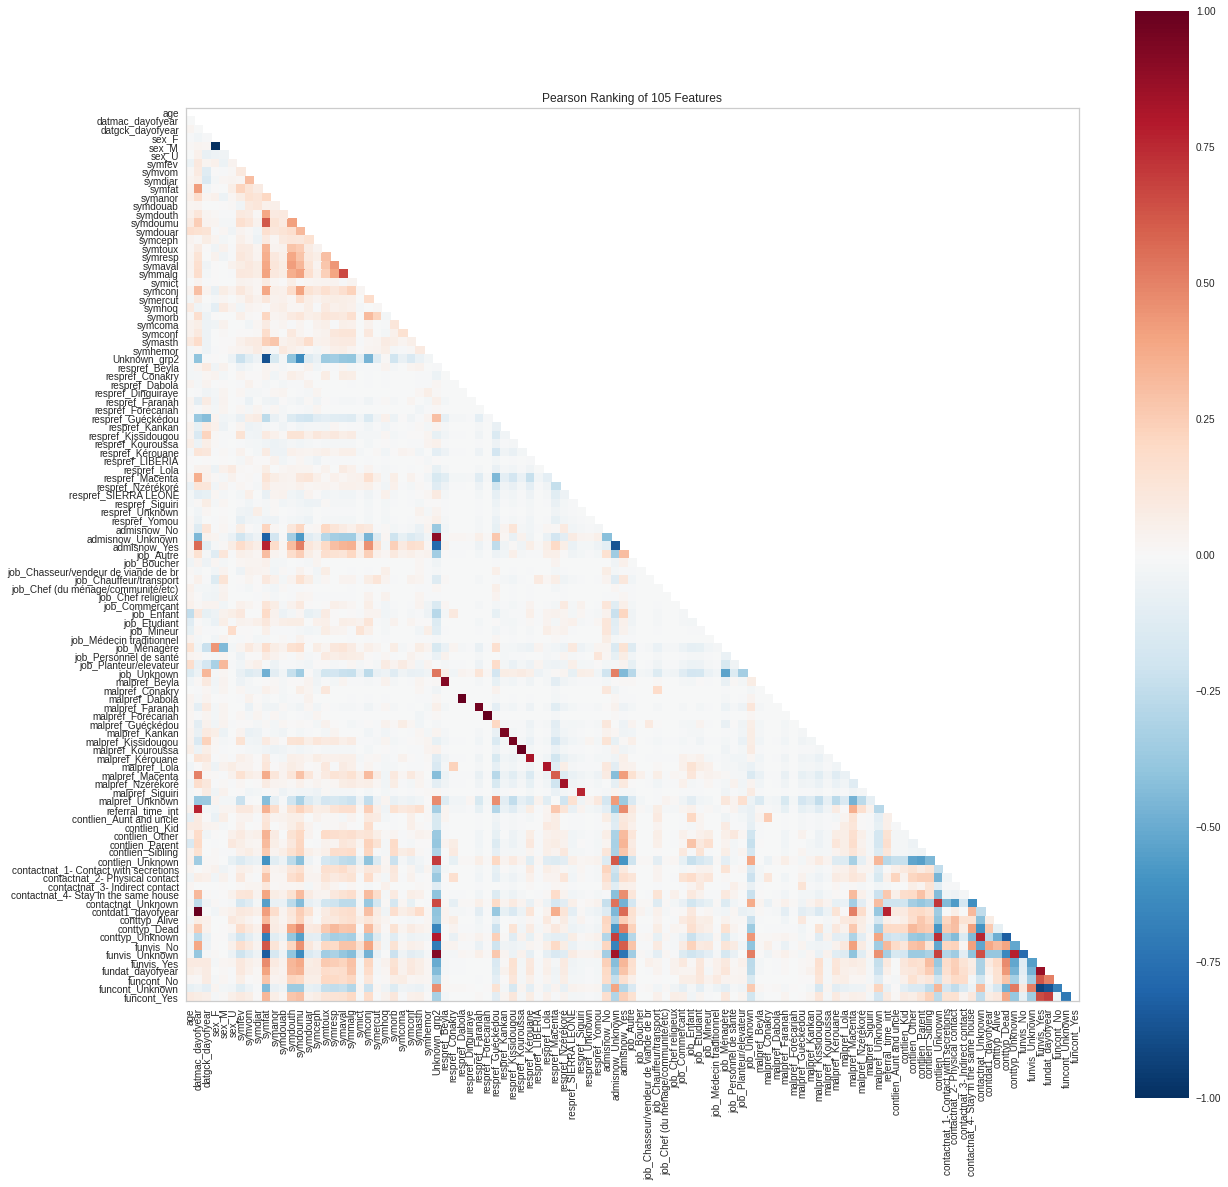

In [419]:
Corr_vision(X_ebo_ml)

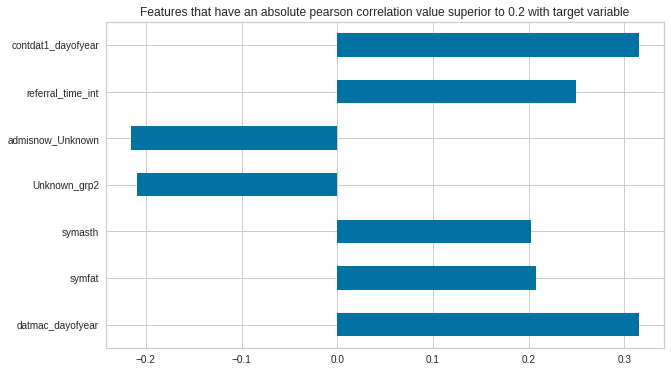

In [422]:
X_y = X_ebo_ml.join(y_ebo_ml)
corr_matrix = X_y.corr()

corr_y = corr_matrix['epistat']
threshold = 0.2
fig, ax = plt.subplots(figsize=(10,6))
corr_y[corr_y.index[abs(corr_y) > threshold].tolist()].drop('epistat').plot(kind='barh')
plt.title('Features that have an absolute pearson correlation value superior to {} with target variable'.format(threshold))
plt.show()

The values above are "correlated" with the output variable 'epistat' (ebola outcome), we expect them to be considered important during the model.

### Class imbalance

Balance is important in order to get a reliable accuracy for unseen datas, if imbalanced, steps need to be taken in order to take this into account. 
A good metric to look at is precision, recall and F1, this is discussed in the report. 

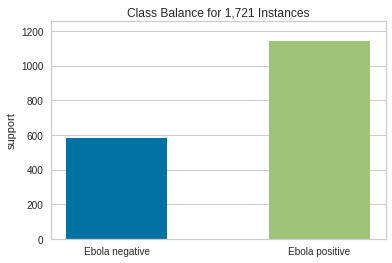

In [360]:
Imbalance(y_ebo_ml)

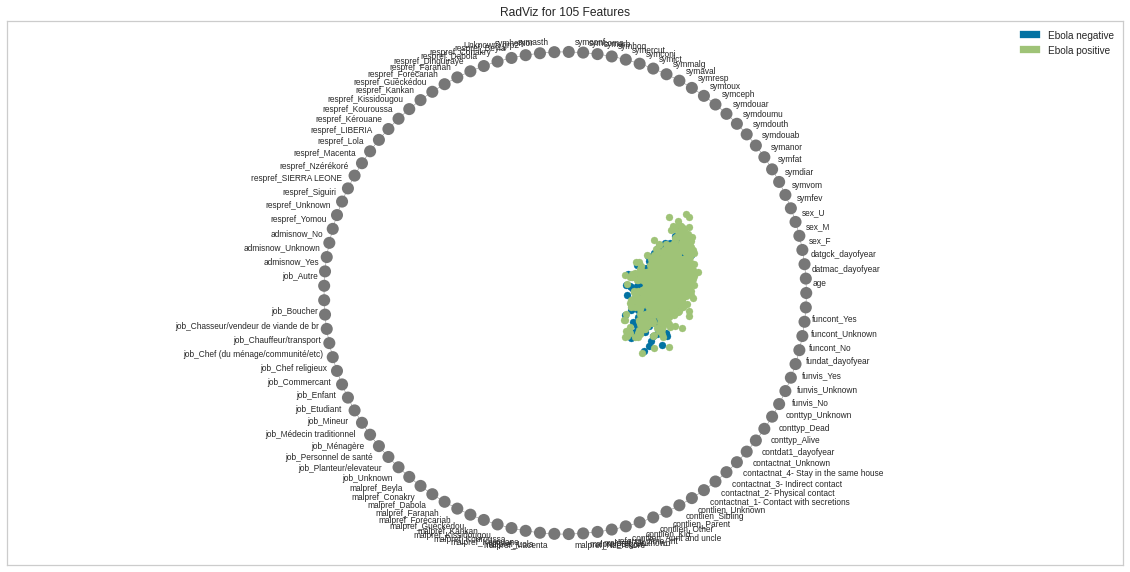

In [367]:
Rad_vision(X_ebo_ml, y_ebo_ml)

In [473]:
X_ebo_ml['respref_Dinguiraye'].value_counts()

0    1720
1       1
Name: respref_Dinguiraye, dtype: int64

The plot above does not tell us much, we would have wished for a distinction of colors between ebola positive and negative patients

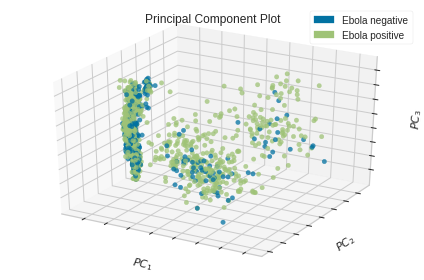

In [370]:
PCA_vision_3D(X_ebo_ml, y_ebo_ml)

#### How to interpret this 
Jean, Cdeic ? 

#### We are in a high dimension dataset, let's try Manifold

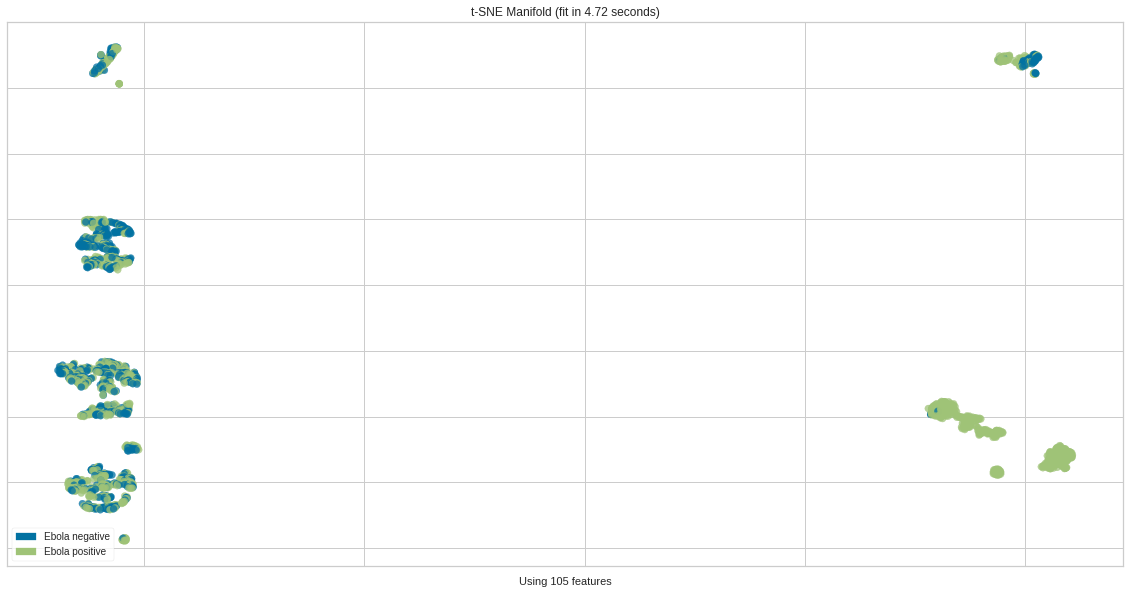

In [371]:
from yellowbrick.features import Manifold

fig, ax = plt.subplots(figsize=(20,10))
# Instantiate the visualizer
viz = Manifold(manifold="tsne",  classes=['Ebola negative', 'Ebola positive'])
viz.fit_transform(X_ebo_ml, y_ebo_ml)  # Fit the data to the visualizer
viz.show()               # Finalize and render the figure
plt.show()

##### Split train/test

Before standardizing, we need to make sure that the dataset is split between train and test !
This is to make sure that the "way" we standardize our train set is "the base" as to how we standardize our test set.

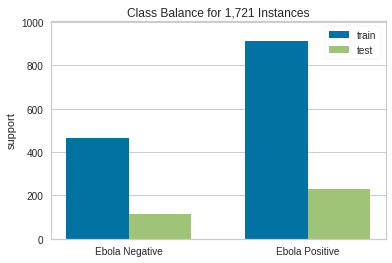

In [377]:

X_ebo_train, X_ebo_test, y_ebo_train, y_ebo_test = train_test_split(X_ebo_ml, y_ebo_ml, test_size=0.2, random_state=0, stratify=y_ebo_ml)


# Instantiate the visualizer
visualizer = ClassBalance(labels=['Ebola Negative', 'Ebola Positive'])

visualizer.fit(y_ebo_train, y_ebo_test)        # Fit the data to the visualizer
visualizer.show()                      # Finalize and render the figure
plt.show()

##### Normalizing the data


In [379]:
scaler3 = StandardScaler()
numerical_col = ['age','datmac_dayofyear', 'datgck_dayofyear', 'referral_time_int', 'contdat1_dayofyear','fundat_dayofyear']
X_ebo_train.loc[:,numerical_col] = scaler3.fit_transform(X_ebo_train[numerical_col])
X_ebo_test.loc[:,numerical_col] = scaler3.transform(X_ebo_test[numerical_col])

/home/lavinia/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/lavinia/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [382]:
########## The    data   is    now     normalized    ###################

## Jean and Ced, you can now use 

In [186]:
############################################################################################################################################

# Predictions outcome

### Outcome 

In [187]:
# apply dictionnary to get -1, 0, 1 for df_outcome  --> 0: recovery, 1: death, -1: unknown
df_outcome  = df_linelist['outcome']
dict_outcome_answer = {'1':'0', '2':'1', '3':'-1', '4':'-1', '9':'-1', '.':'-1'}
df_outcome = df_outcome.astype('str')
df_outcome = df_outcome.apply(lambda x : dict_outcome_answer[x])

### Assemble

In [192]:
# concatenate symptoms, age, sex and outcome (also add epistat so that we only keep ebola positive people)
df_out = pd.concat([df_age, df_sex, df_symp, df_outcome, df_ebola], axis = 1, join = 'outer').astype('int')
df_out = df_out[df_out['epistat']!=0]
df_out = df_out[df_out['epistat']!=-1]
print(df_out['epistat'].value_counts())
df_out.drop('epistat', axis=1, inplace = True)

# add constant column --> only for linear regression, SVM, etc
#df_out = sm.add_constant(df_out).astype('int')
df_out

1    1507
Name: epistat, dtype: int64


,age,sex,symfev,symn,symv,symvom,symdiar,symfat,symanor,symdouab,...,hemvag,hempet,hemuri,hemaut,contsusp,funvis,hospvis,anicon,anitiq,outcome
0,60,0,1,-1,-1,1,0,-1,-1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
1,35,0,1,-1,-1,1,1,-1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,40,1,1,-1,-1,0,0,-1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
3,40,1,1,-1,-1,0,1,-1,1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
4,8,0,1,-1,-1,0,1,-1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,26,1,1,-1,-1,1,1,-1,1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2495,-1,0,0,-1,-1,1,1,-1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2496,43,1,0,-1,-1,0,1,-1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2498,6,1,1,-1,-1,0,0,-1,1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1


### Feature processing

In [193]:
# first convert all -1 to NaN so that we can use the dropna() function
df_out.replace(-1, np.nan, inplace=True)
# then drop columns with only nans 
df_out.dropna(axis=0, how='all', subset=symptoms, inplace=True)
# convert all NaN to -1 
df_out.replace(np.nan, -1, inplace=True)
df_out   

,age,sex,symfev,symn,symv,symvom,symdiar,symfat,symanor,symdouab,...,hemvag,hempet,hemuri,hemaut,contsusp,funvis,hospvis,anicon,anitiq,outcome
0,60.0,0.0,1.0,-1.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1,35.0,0.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
2,40.0,1.0,1.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
3,40.0,1.0,1.0,-1.0,-1.0,0.0,1.0,-1.0,1.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
4,8.0,0.0,1.0,-1.0,-1.0,0.0,1.0,-1.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,26.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
2495,-1.0,0.0,0.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
2496,43.0,1.0,0.0,-1.0,-1.0,0.0,1.0,-1.0,0.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
2498,6.0,1.0,1.0,-1.0,-1.0,0.0,0.0,-1.0,1.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0


## First proposition of data frame

In [194]:
df_out_simple = delete_minus1(df_out)
df_out_simple

,age,sex,symfev,symvom,symdiar,symanor,symdouab,symdouar,symceph,symhoq,symasth,symhemor,outcome
1,35.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,40.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,40.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,8.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5,12.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,45.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2494,26.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2496,43.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2498,6.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [195]:
from sklearn.preprocessing import StandardScaler
############## WRONG ! you need to standardize just like done on 3rd dataframe

## standardize age for df_out_simple

scaler1 = StandardScaler()
scaler1.fit(df_out_simple['age'].to_numpy().reshape(-1, 1))
df_out_simple['age'] = scaler1.transform(df_out_simple['age'].to_numpy().reshape(-1, 1))
df_out_simple

,age,sex,symfev,symvom,symdiar,symanor,symdouab,symdouar,symceph,symhoq,symasth,symhemor,outcome
1,0.139795,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.409060,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.409060,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-1.314234,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5,-1.098822,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,0.678324,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2494,-0.344881,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2496,0.570619,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2498,-1.421940,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [196]:
y_out_simple = df_out_simple['outcome'].astype(float)
X_out_simple = df_out_simple.drop(['outcome'], axis = 1).astype(float)

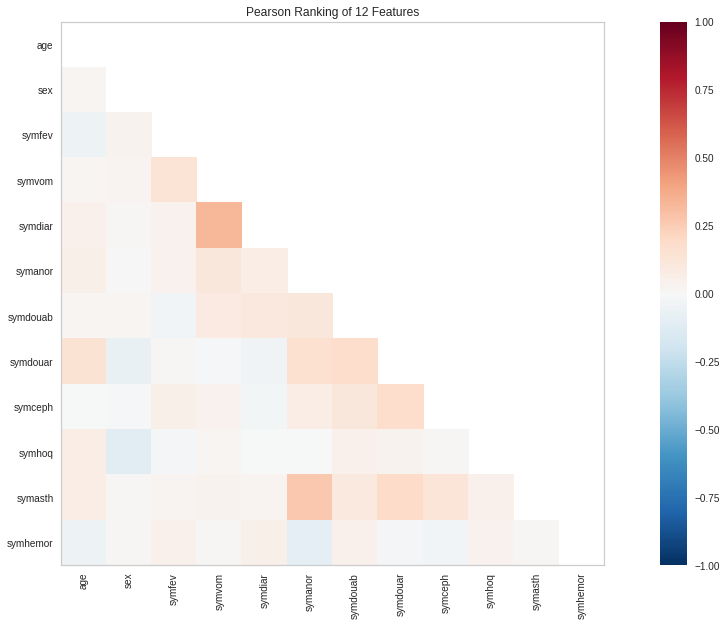

In [197]:
Corr_vision(X_out_simple)

## Second proposition of data frame

In [198]:
df_out_extra = df_out
df_out_extra = df_out_extra[df_out_extra['outcome']!=-1]     
# delete all rows where y = -1:
df_out_extra = make_indicators(df_out_extra, df_out_extra.drop('outcome', axis=1).columns, [-1]*len(df_out_extra.drop('outcome', axis=1).columns), False)   # apply Cédric's function
df_out_extra

,age,sex,symfev,symn,symv,symvom,symdiar,symfat,symanor,symdouab,...,hemtou_indicator,hemvag_indicator,hempet_indicator,hemuri_indicator,hemaut_indicator,contsusp_indicator,funvis_indicator,hospvis_indicator,anicon_indicator,anitiq_indicator
0,60.0,0.0,1.0,-1.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,35.0,0.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.0,1.0,1.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.0,1.0,1.0,-1.0,-1.0,0.0,1.0,-1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.0,0.0,1.0,-1.0,-1.0,0.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,26.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2495,-1.0,0.0,0.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2496,43.0,1.0,0.0,-1.0,-1.0,0.0,1.0,-1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,6.0,1.0,1.0,-1.0,-1.0,0.0,0.0,-1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [199]:
## standardize age for df_out_extra

# change -1 to Nan so that it is not take into account when doing standardization 
df_out_extra['age'].replace(-1, np.nan, inplace=True)
df_out_extra

# standardization
scaler2 = StandardScaler()
scaler2.fit(df_out_extra['age'].to_numpy().reshape(-1, 1))
df_out_extra['age'] = scaler2.transform(df_out_extra['age'].to_numpy().reshape(-1, 1))

# we can rechange nans to -1 
df_out_extra['age'].replace(np.nan, -1, inplace=True)
df_out_extra

,age,sex,symfev,symn,symv,symvom,symdiar,symfat,symanor,symdouab,...,hemtou_indicator,hemvag_indicator,hempet_indicator,hemuri_indicator,hemaut_indicator,contsusp_indicator,funvis_indicator,hospvis_indicator,anicon_indicator,anitiq_indicator
0,1.478582,0.0,1.0,-1.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.133407,0.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.402442,1.0,1.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.402442,1.0,1.0,-1.0,-1.0,0.0,1.0,-1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.319381,0.0,1.0,-1.0,-1.0,0.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,-0.350856,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2495,-1.000000,0.0,0.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2496,0.563863,1.0,0.0,-1.0,-1.0,0.0,1.0,-1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,-1.426995,1.0,1.0,-1.0,-1.0,0.0,0.0,-1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [200]:
# sanity check 
print(sum(df_out_extra['age_indicator']==0))
print(sum(df_out_extra['age']==-1))

print(sum(df_out_extra['outcome']==0))
print(sum(df_out_extra['outcome']==1))

7
7
446
821


In [201]:
y_out_extra = df_out_extra['outcome'].astype(float)
X_out_extra = df_out_extra.drop(['outcome'], axis = 1).astype(float)

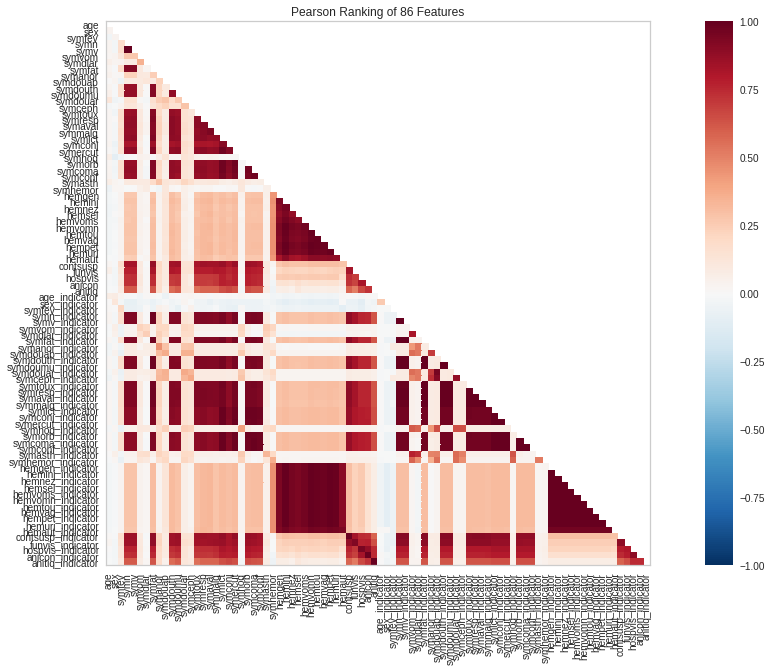

In [202]:
Corr_vision(X_out_extra)  # very high correlation between some features so 

## Third proposition of data frame for outcome 

In [383]:
df_rid

,msfid,age,datmac_dayofyear,datgck_dayofyear,sex_F,sex_M,sex_U,symfev,symvom,symdiar,...,conttyp_Dead,conttyp_Unknown,funvis_No,funvis_Unknown,funvis_Yes,fundat_dayofyear,funcont_No,funcont_Unknown,funcont_Yes,epistat
0,G10,35.0,-1,-1,0,1,0,1,1,1,...,0,1,0,1,0,-1,0,1,0,1
1,G100,40.0,-1,101,1,0,0,1,0,0,...,0,1,0,1,0,-1,0,1,0,1
2,G1000,40.0,260,-1,1,0,0,1,0,1,...,0,1,0,1,0,-1,0,1,0,1
3,G1001,8.0,260,262,0,1,0,1,0,1,...,0,1,0,1,0,-1,0,1,0,1
4,G1002,12.0,258,262,0,1,0,1,1,1,...,1,0,1,0,0,-1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,G995,30.0,-1,-1,0,1,0,0,1,1,...,0,1,0,1,0,-1,0,1,0,1
1717,G996,43.0,-1,261,1,0,0,0,0,1,...,0,1,0,1,0,-1,0,1,0,1
1718,G997,34.0,-1,262,0,1,0,0,1,0,...,0,1,0,1,0,-1,0,1,0,0
1719,G998,6.0,-1,260,1,0,0,1,0,0,...,0,1,0,1,0,-1,0,1,0,1


First concatenate df_outcome (cleaned, but we need to still remove -1 "the unknwons") with msfid, in order to merge with df_rid 



In [435]:
df_outcome = df_outcome.astype('int')
df_temp = pd.concat([df_outcome, df_linelist['msfid']], axis = 1, join = 'outer')
df_temp

,outcome,msfid
0,1,G1
1,1,G10
2,0,G100
3,1,G1000
4,1,G1001
...,...,...
2495,1,G995
2496,1,G996
2497,-1,G997
2498,1,G998


In [444]:
df_out_rid = df_temp[df_temp['outcome'] != -1]
df_out_rid = df_out_rid.merge(df_rid,on = 'msfid')
# We predict the outcome only on ebola postive people, by outcome we mean (dead, not dead)
df_out_rid['epistat'] =df_out_rid['epistat'].replace(0, np.nan)
df_out_rid.dropna(axis = 0, inplace = True)
df_out_rid

,outcome,msfid,age,datmac_dayofyear,datgck_dayofyear,sex_F,sex_M,sex_U,symfev,symvom,...,conttyp_Dead,conttyp_Unknown,funvis_No,funvis_Unknown,funvis_Yes,fundat_dayofyear,funcont_No,funcont_Unknown,funcont_Yes,epistat
0,1,G10,35.0,-1,-1,0,1,0,1,1,...,0,1,0,1,0,-1,0,1,0,1.0
1,0,G100,40.0,-1,101,1,0,0,1,0,...,0,1,0,1,0,-1,0,1,0,1.0
2,1,G1000,40.0,260,-1,1,0,0,1,0,...,0,1,0,1,0,-1,0,1,0,1.0
3,1,G1001,8.0,260,262,0,1,0,1,0,...,0,1,0,1,0,-1,0,1,0,1.0
4,0,G1002,12.0,258,262,0,1,0,1,1,...,1,0,1,0,0,-1,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,1,G994,26.0,-1,261,1,0,0,1,1,...,0,1,0,1,0,-1,0,1,0,1.0
1166,1,G995,30.0,-1,-1,0,1,0,0,1,...,0,1,0,1,0,-1,0,1,0,1.0
1167,1,G996,43.0,-1,261,1,0,0,0,0,...,0,1,0,1,0,-1,0,1,0,1.0
1168,1,G998,6.0,-1,260,1,0,0,1,0,...,0,1,0,1,0,-1,0,1,0,1.0


In [445]:
# Let's drop msfid and epistat

df_out_rid.drop(['msfid','epistat'], inplace= True, axis = 1)


In [446]:
# This is now the third dataframe to predict the outcome knowing your patient is positive 
df_out_rid

,outcome,age,datmac_dayofyear,datgck_dayofyear,sex_F,sex_M,sex_U,symfev,symvom,symdiar,...,conttyp_Alive,conttyp_Dead,conttyp_Unknown,funvis_No,funvis_Unknown,funvis_Yes,fundat_dayofyear,funcont_No,funcont_Unknown,funcont_Yes
0,1,35.0,-1,-1,0,1,0,1,1,1,...,0,0,1,0,1,0,-1,0,1,0
1,0,40.0,-1,101,1,0,0,1,0,0,...,0,0,1,0,1,0,-1,0,1,0
2,1,40.0,260,-1,1,0,0,1,0,1,...,0,0,1,0,1,0,-1,0,1,0
3,1,8.0,260,262,0,1,0,1,0,1,...,0,0,1,0,1,0,-1,0,1,0
4,0,12.0,258,262,0,1,0,1,1,1,...,0,1,0,1,0,0,-1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,1,26.0,-1,261,1,0,0,1,1,1,...,0,0,1,0,1,0,-1,0,1,0
1166,1,30.0,-1,-1,0,1,0,0,1,1,...,0,0,1,0,1,0,-1,0,1,0
1167,1,43.0,-1,261,1,0,0,0,0,1,...,0,0,1,0,1,0,-1,0,1,0
1168,1,6.0,-1,260,1,0,0,1,0,0,...,0,0,1,0,1,0,-1,0,1,0


In [447]:
# For ridha's dataframe for yeah 
X_out_ml = df_out_rid.drop(columns = ['outcome'])
y_out_ml = df_out_rid['outcome']

#### We note that this column has only zero and we'll drop it

In [475]:
X_out_ml['respref_Dinguiraye'].value_counts()

0    1137
Name: respref_Dinguiraye, dtype: int64

In [476]:
X_out_ml.drop(columns=['respref_Dinguiraye'], inplace = True)

#### Correlation matrix 

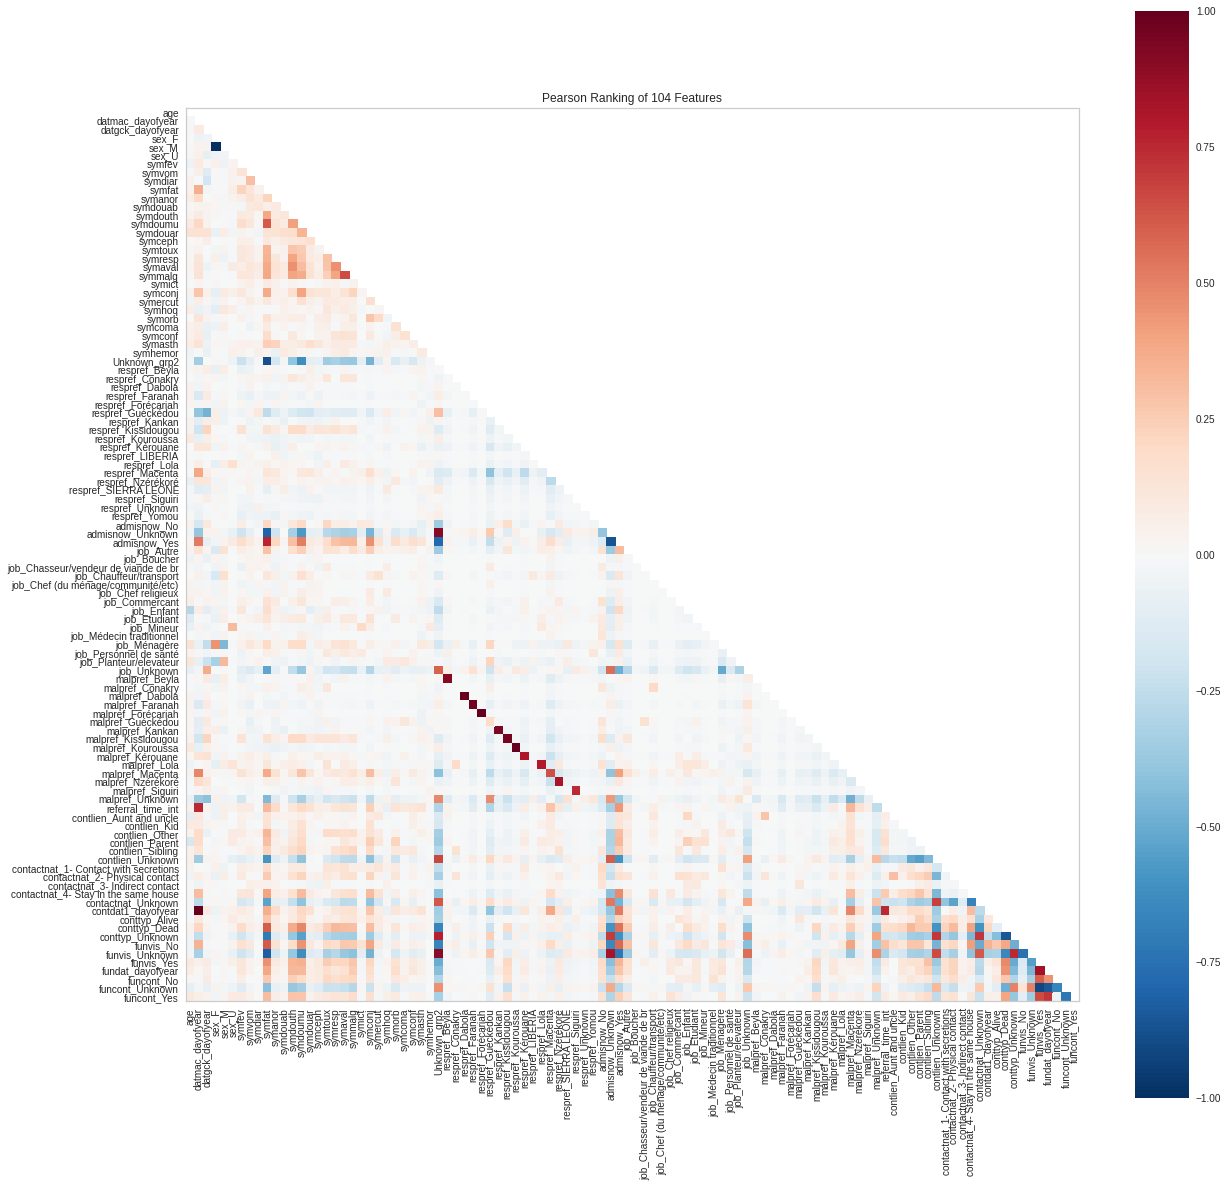

In [477]:
Corr_vision(X_out_ml)

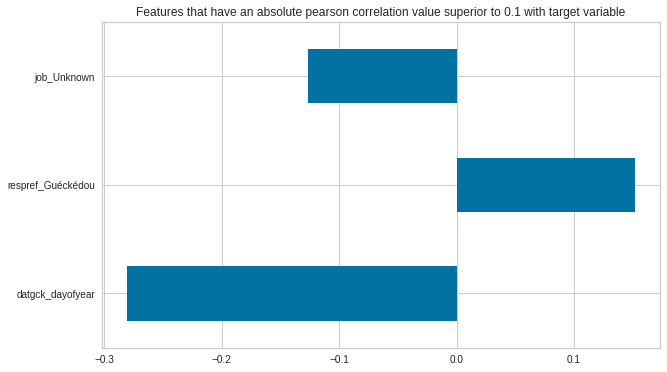

In [480]:
X_y_out = X_out_ml.join(y_out_ml, how = 'outer')
corr_matrix = X_y_out.corr()

corr_y = corr_matrix['outcome']
threshold = 0.1
fig, ax = plt.subplots(figsize=(10,6))
corr_y[corr_y.index[abs(corr_y) > threshold].tolist()].drop('outcome').plot(kind='barh')
plt.title('Features that have an absolute pearson correlation value superior to {} with target variable'.format(threshold))
plt.show()



### Class imbalance

Balance is important in order to get a reliable accuracy for unseen datas, if imbalanced, steps need to be taken in order to take this into account. 
A good metric to look at is precision, recall and F1, this is discussed in the report. 

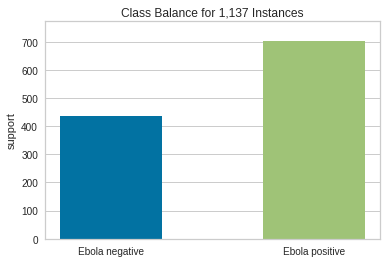

In [481]:
Imbalance(y_out_ml)

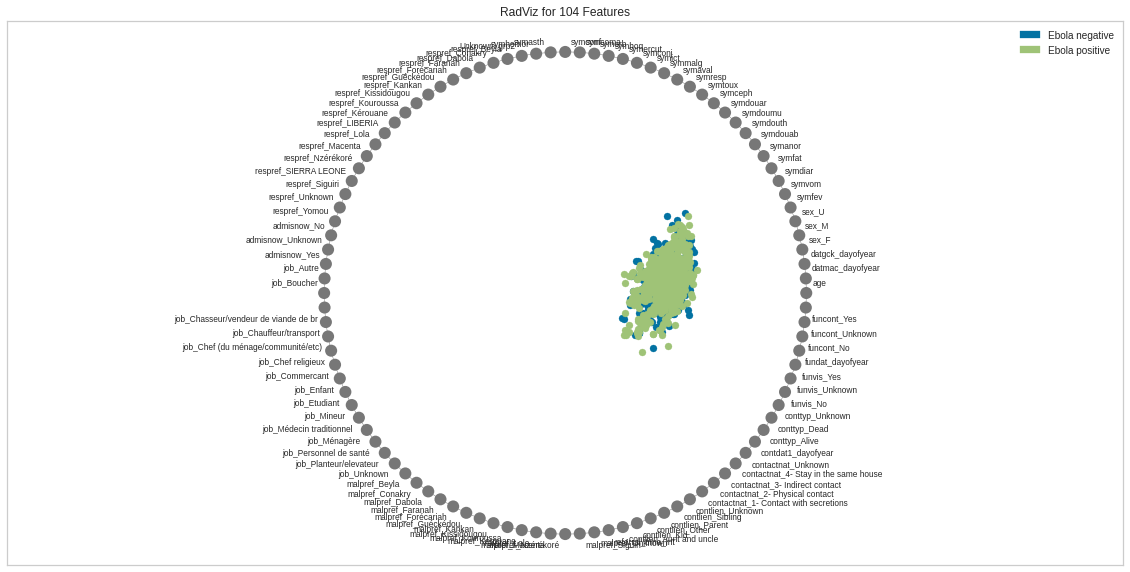

In [482]:
Rad_vision(X_out_ml, y_out_ml)

The plot above does not tell us much, we would have wished for a distinction of colors between ebola positive and negative patients

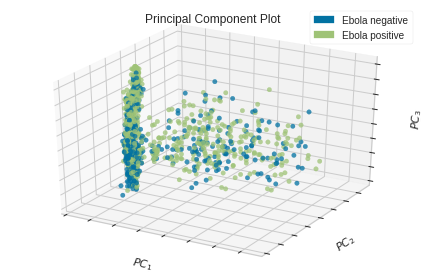

In [483]:
PCA_vision_3D(X_out_ml, y_out_ml)

#### How to interpret this 
Jean, Cdeic ? 

#### We are in a high dimension dataset, let's try Manifold

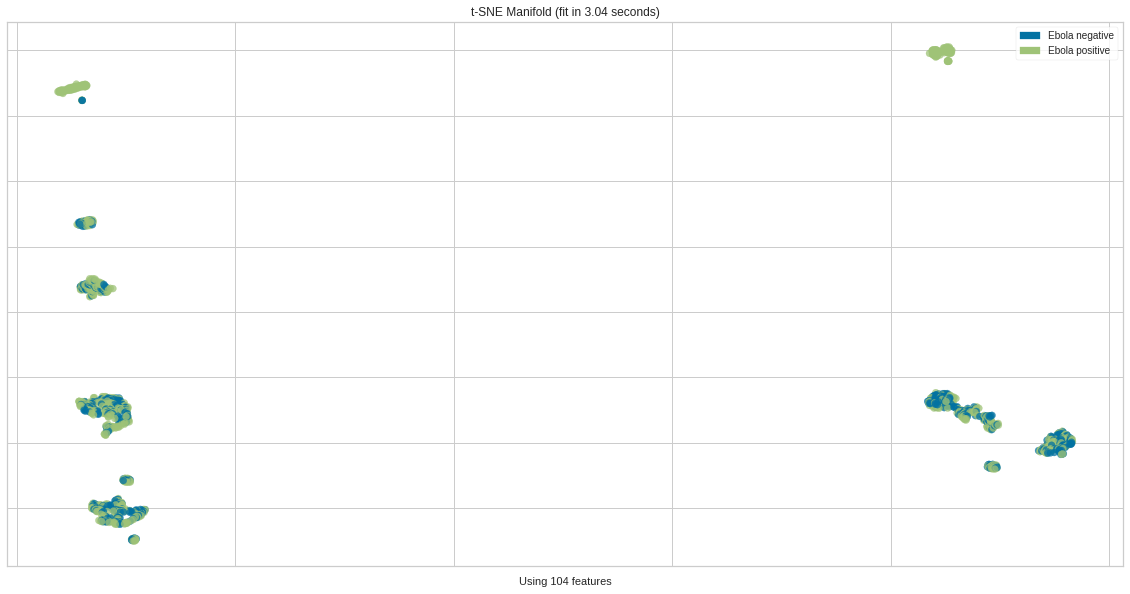

In [484]:
from yellowbrick.features import Manifold

fig, ax = plt.subplots(figsize=(20,10))
# Instantiate the visualizer
viz = Manifold(manifold="tsne",  classes=['Ebola negative', 'Ebola positive'])
viz.fit_transform(X_out_ml, y_out_ml)  # Fit the data to the visualizer
viz.show()               # Finalize and render the figure
plt.show()

##### Split train/test

Before standardizing, we need to make sure that the dataset is split between train and test !
This is to make sure that the "way" we standardize our train set is "the base" as to how we standardize our test set.

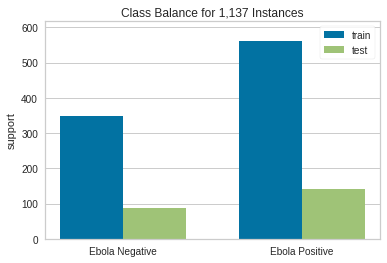

In [485]:

X_out_train, X_out_test, y_out_train, y_out_test = train_test_split(X_out_ml, y_out_ml, test_size=0.2, random_state=0, stratify=y_out_ml)


# Instantiate the visualizer
visualizer = ClassBalance(labels=['Ebola Negative', 'Ebola Positive'])

visualizer.fit(y_out_train, y_out_test)        # Fit the data to the visualizer
visualizer.show()                      # Finalize and render the figure
plt.show()

##### Normalizing the data


In [486]:
scaler3 = StandardScaler()
numerical_col = ['age','datmac_dayofyear', 'datgck_dayofyear', 'referral_time_int', 'contdat1_dayofyear','fundat_dayofyear']
X_out_train.loc[:,numerical_col] = scaler3.fit_transform(X_out_train[numerical_col])
X_out_test.loc[:,numerical_col] = scaler3.transform(X_out_test[numerical_col])

/home/lavinia/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/lavinia/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [382]:
########## The    data   is    now     normalized    ###################

## Jean and Ced, you can now use 

## ML models to predict outcome

# REMEMBER TO USE VALIDATION CURVE TO GET AN IDEA ON THE HYPERPARAMETERS !
# REMEMBER TO DO CROSS VALIDATION FOR HYPERPARAMETERS; AND THEN UPDATING AND THEN CHECKING THE SCORES WITH FUNCTION IN HELPERS